In [19]:
400*20/100

80.0

In [ ]:
400 - 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample
import pywt

In [2]:
def wavelet_denoise(ecg_signal, wavelet="db4", level=3):
    """
    Apply wavelet denoising to a 12-lead ECG signal.

    Parameters:
    - ecg_signal: numpy array of shape (12, 500)
    - wavelet: the type of wavelet to use (default is 'db4')
    - level: level of decomposition (default is 3)

    Returns:
    - denoised_ecg: numpy array of the denoised ECG signal with the same shape as the input
    """
    denoised_ecg = np.zeros_like(ecg_signal)
    for i in range(ecg_signal.shape[0]):
        coeffs = pywt.wavedec(ecg_signal[i], wavelet, level=level)
        sigma = np.median(np.abs(coeffs[-1])) / 0.6745
        threshold = sigma * np.sqrt(2 * np.log(len(ecg_signal[i])))
        denoised_coeffs = [pywt.threshold(c, threshold, mode="soft") for c in coeffs]
        denoised_ecg[i] = pywt.waverec(denoised_coeffs, wavelet)

    return denoised_ecg

In [3]:
PERIOD = 5000

In [5]:
original = pd.read_csv("/Users/ljoana/repos/rPSMF/ExperimentBeijing/beijing_temperature.csv", header=None).to_numpy()
baseline = np.mean(original, axis=1)

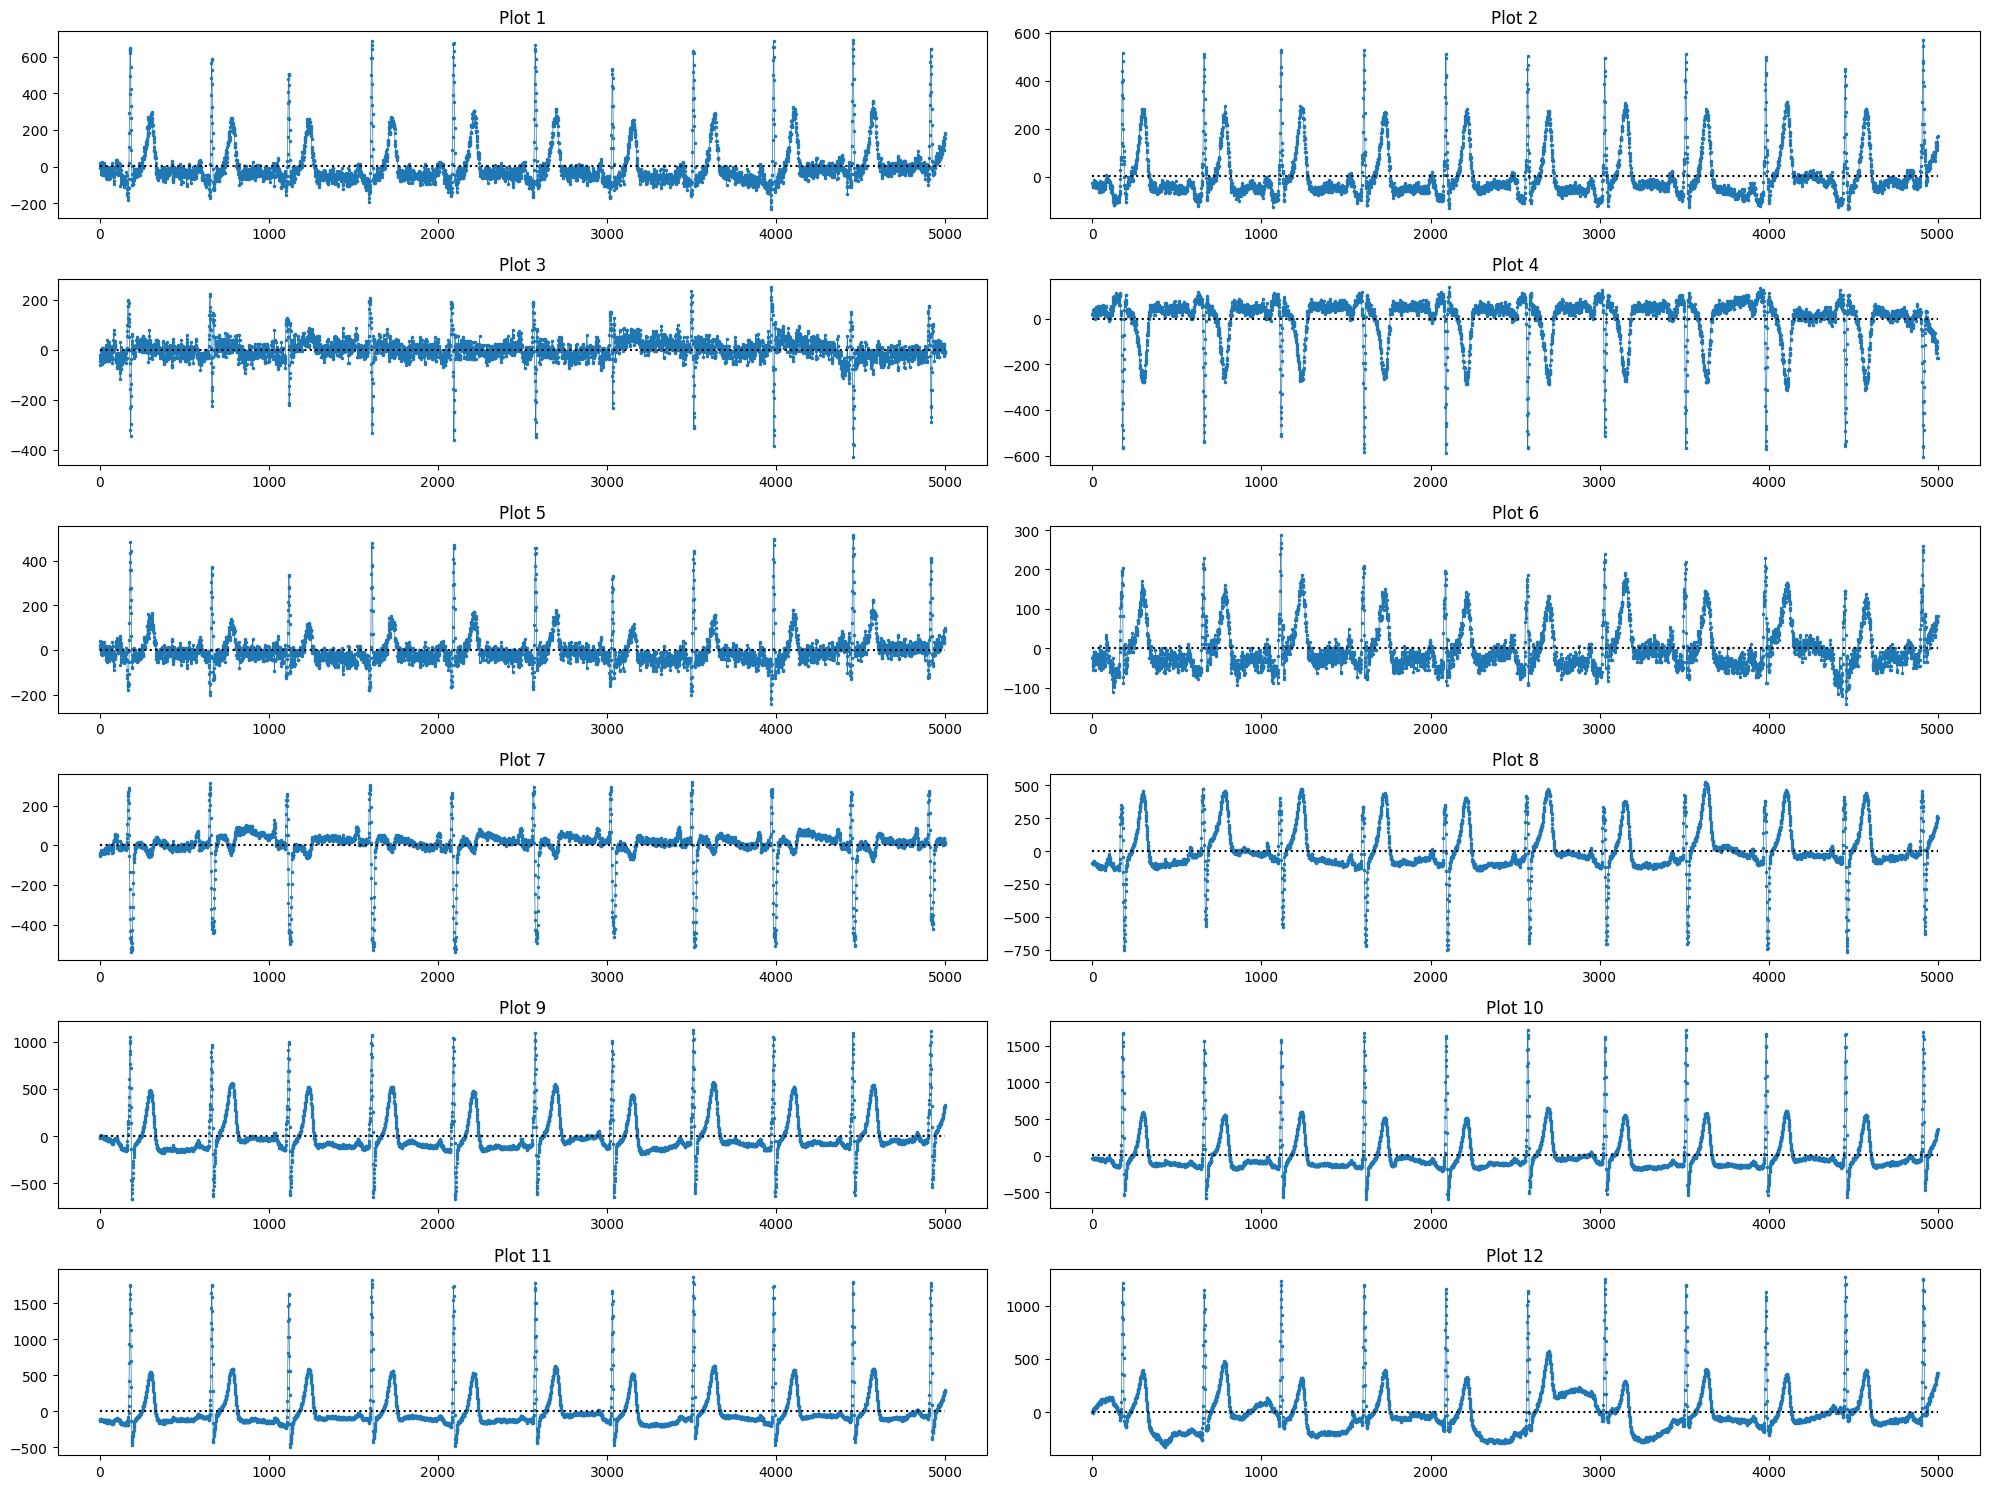

In [6]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i in range(12):
    axes[i].plot(original[i][:5000], '.-', linewidth=0.5, markersize=3)
    axes[i].hlines(baseline[i], 0, 5000, linestyles="dotted", colors="black")
    axes[i].set_title(f"Plot {i+1}")
plt.tight_layout()
plt.show()

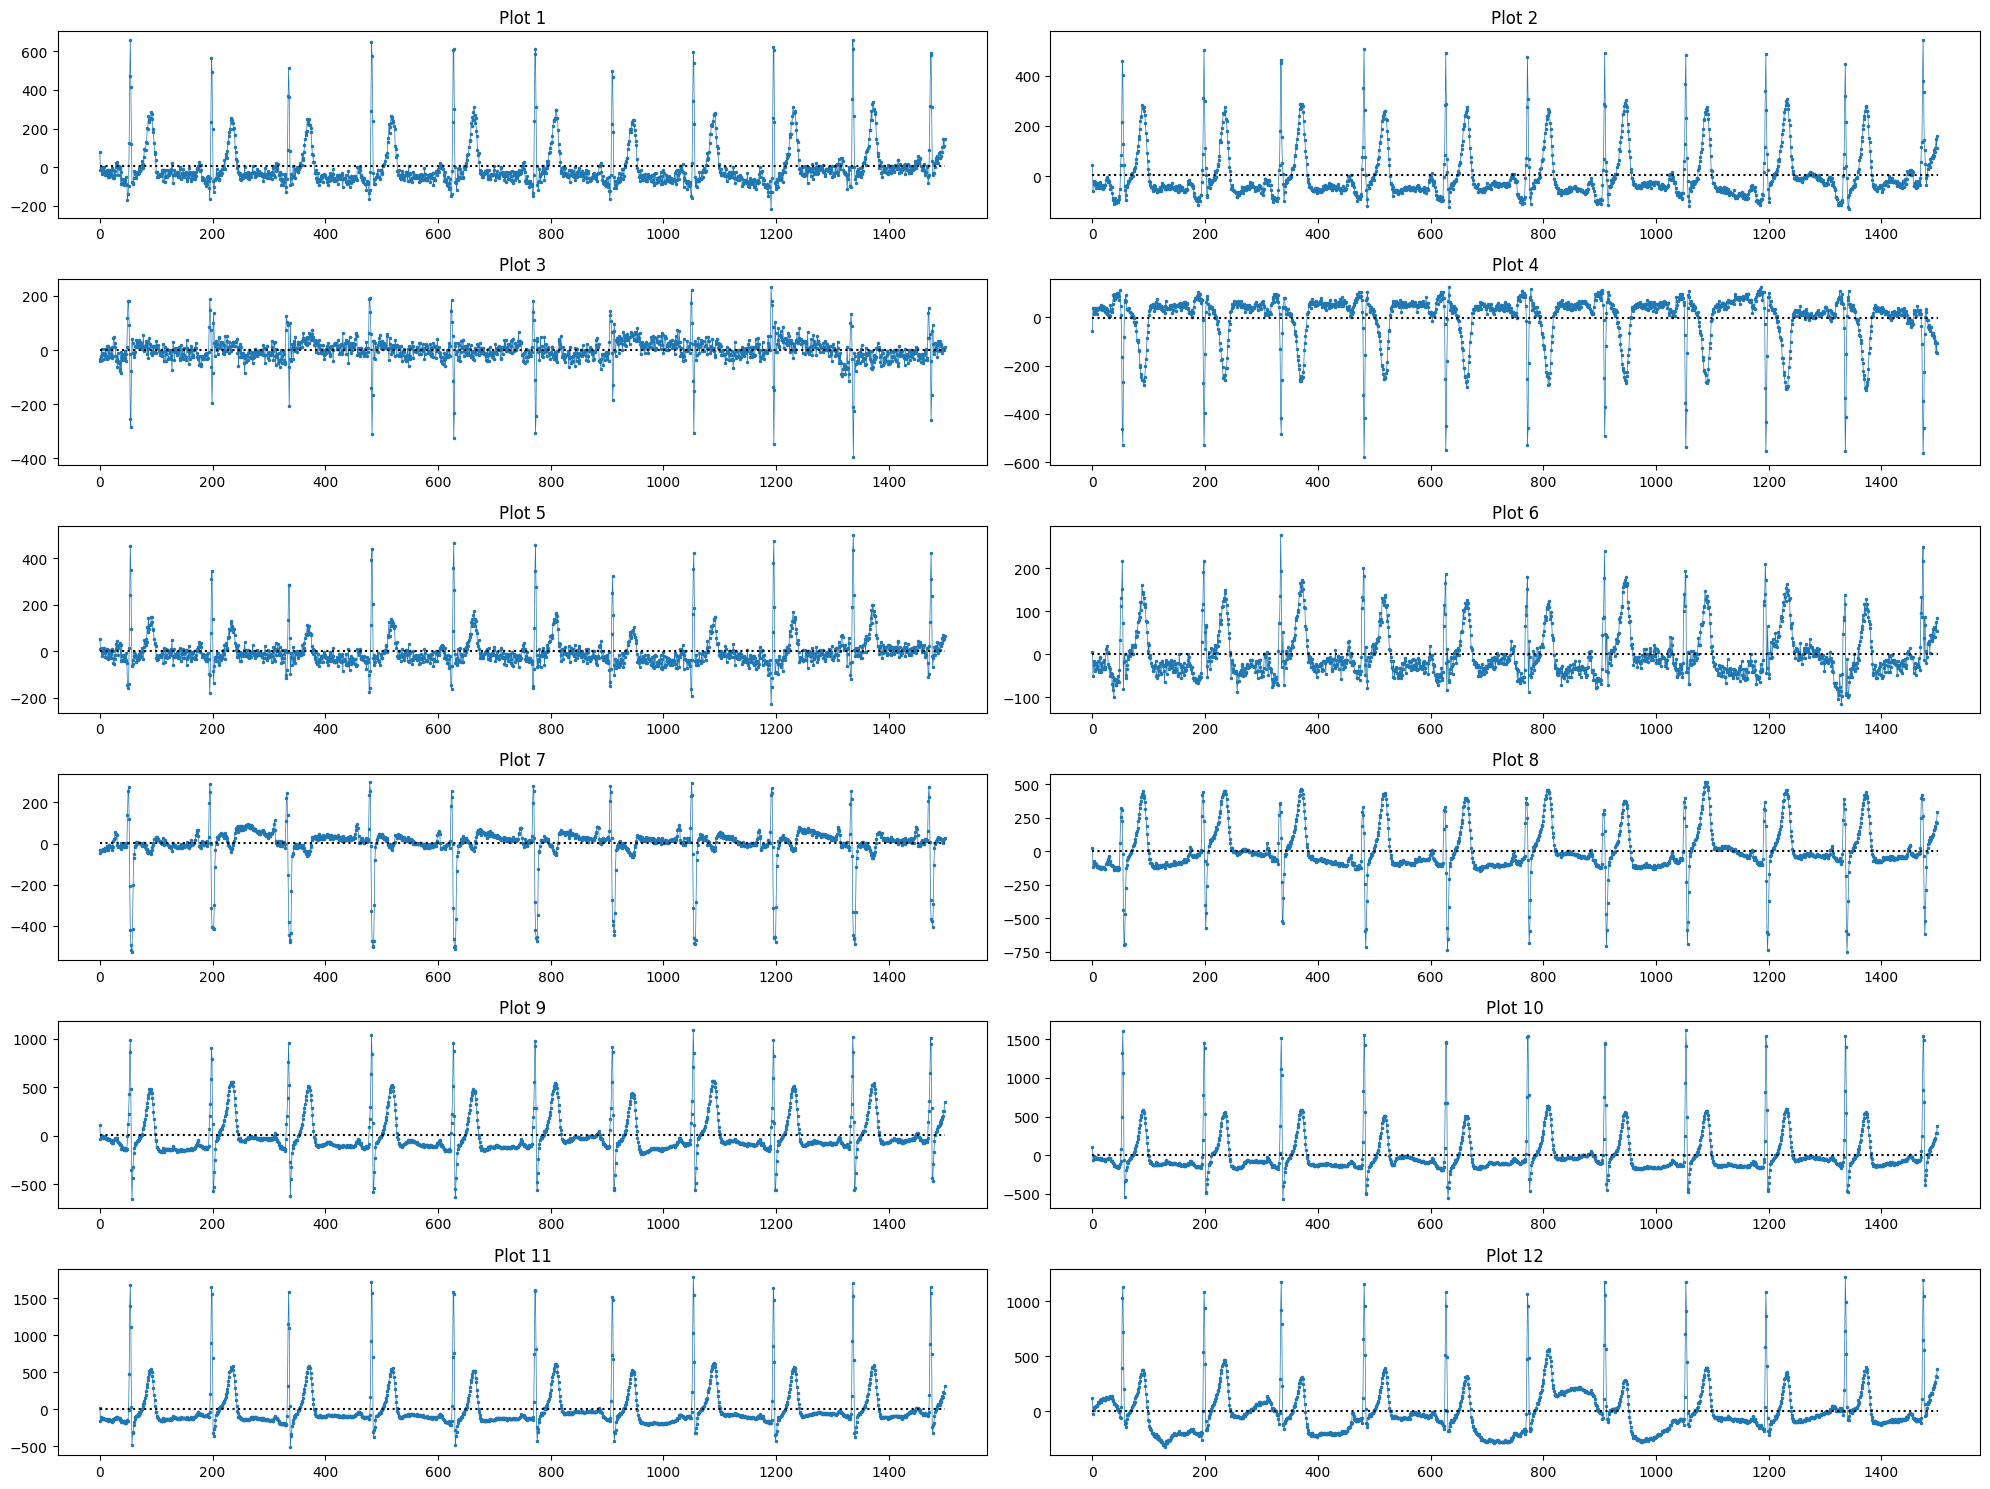

In [7]:
original = resample(original, 1500, axis=1)
original = np.round(original).astype(int)
baseline = np.mean(original, axis=1)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i in range(12):
    axes[i].plot(original[i], '.-', linewidth=0.5, markersize=3)
    axes[i].hlines(baseline[i], 0, 1500, linestyles="dotted", colors="black")
    axes[i].set_title(f"Plot {i+1}")
plt.tight_layout()
plt.show()

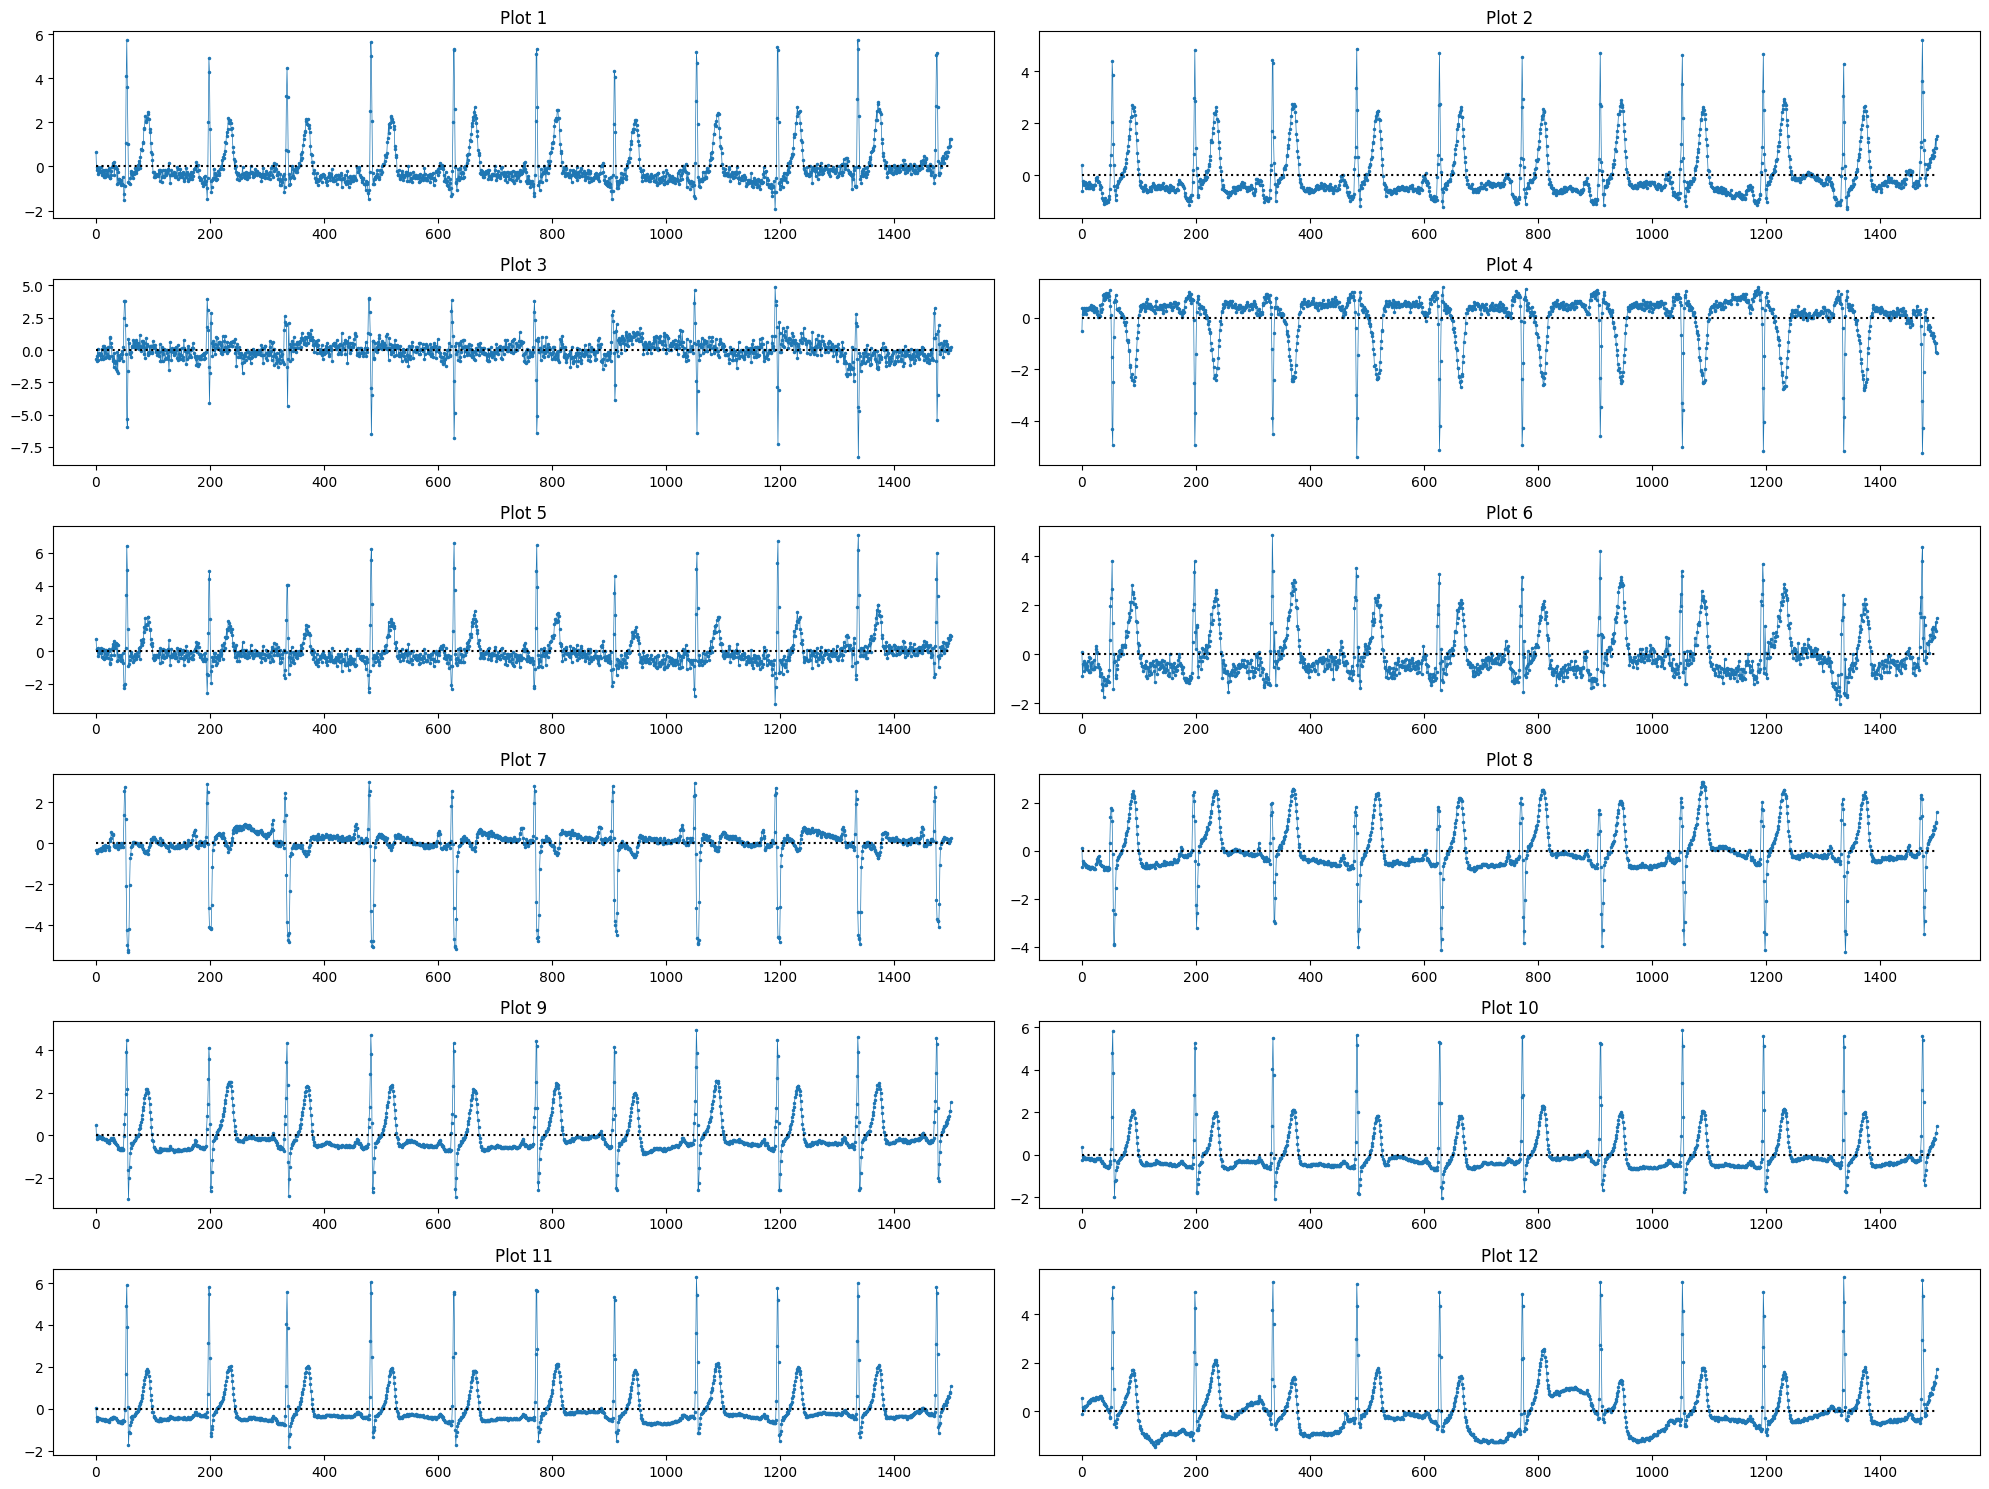

In [8]:
original = ((original.T - original.T.mean(axis=0)) / (original.T.std(axis=0))).T
baseline = np.mean(original, axis=1)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i in range(12):
    axes[i].plot(original[i], '.-', linewidth=0.5, markersize=3)
    axes[i].hlines(baseline[i], 0, 1500, linestyles="dotted", colors="black")
    axes[i].set_title(f"Plot {i+1}")
plt.tight_layout()
plt.show()

In [9]:
Y = pd.read_csv("/Users/ljoana/repos/rPSMF/ExperimentBeijing/beijing_temperature.csv", header=None).to_numpy()
Y

array([[ -10,    5,   10, ...,  156,  181,  176],
       [ -29,  -29,  -34, ...,  146,  166,  171],
       [ -20,  -34,  -44, ...,  -10,  -15,   -5],
       ...,
       [ -34,  -39,  -34, ...,  342,  356,  361],
       [-112, -122, -127, ...,  273,  288,  298],
       [   5,    0,   -5, ...,  351,  366,  371]])

In [10]:
Y = resample(Y, 1500, axis=1)
Y = np.round(Y).astype(int)
Y = Y[:, :PERIOD]
Y = wavelet_denoise(Y, wavelet="db4", level=None)
Y = ((Y.T - Y.T.mean(axis=0)) / (Y.T.std(axis=0))).T
baseline = np.mean(Y, axis=1)
Y.shape

(12, 1500)

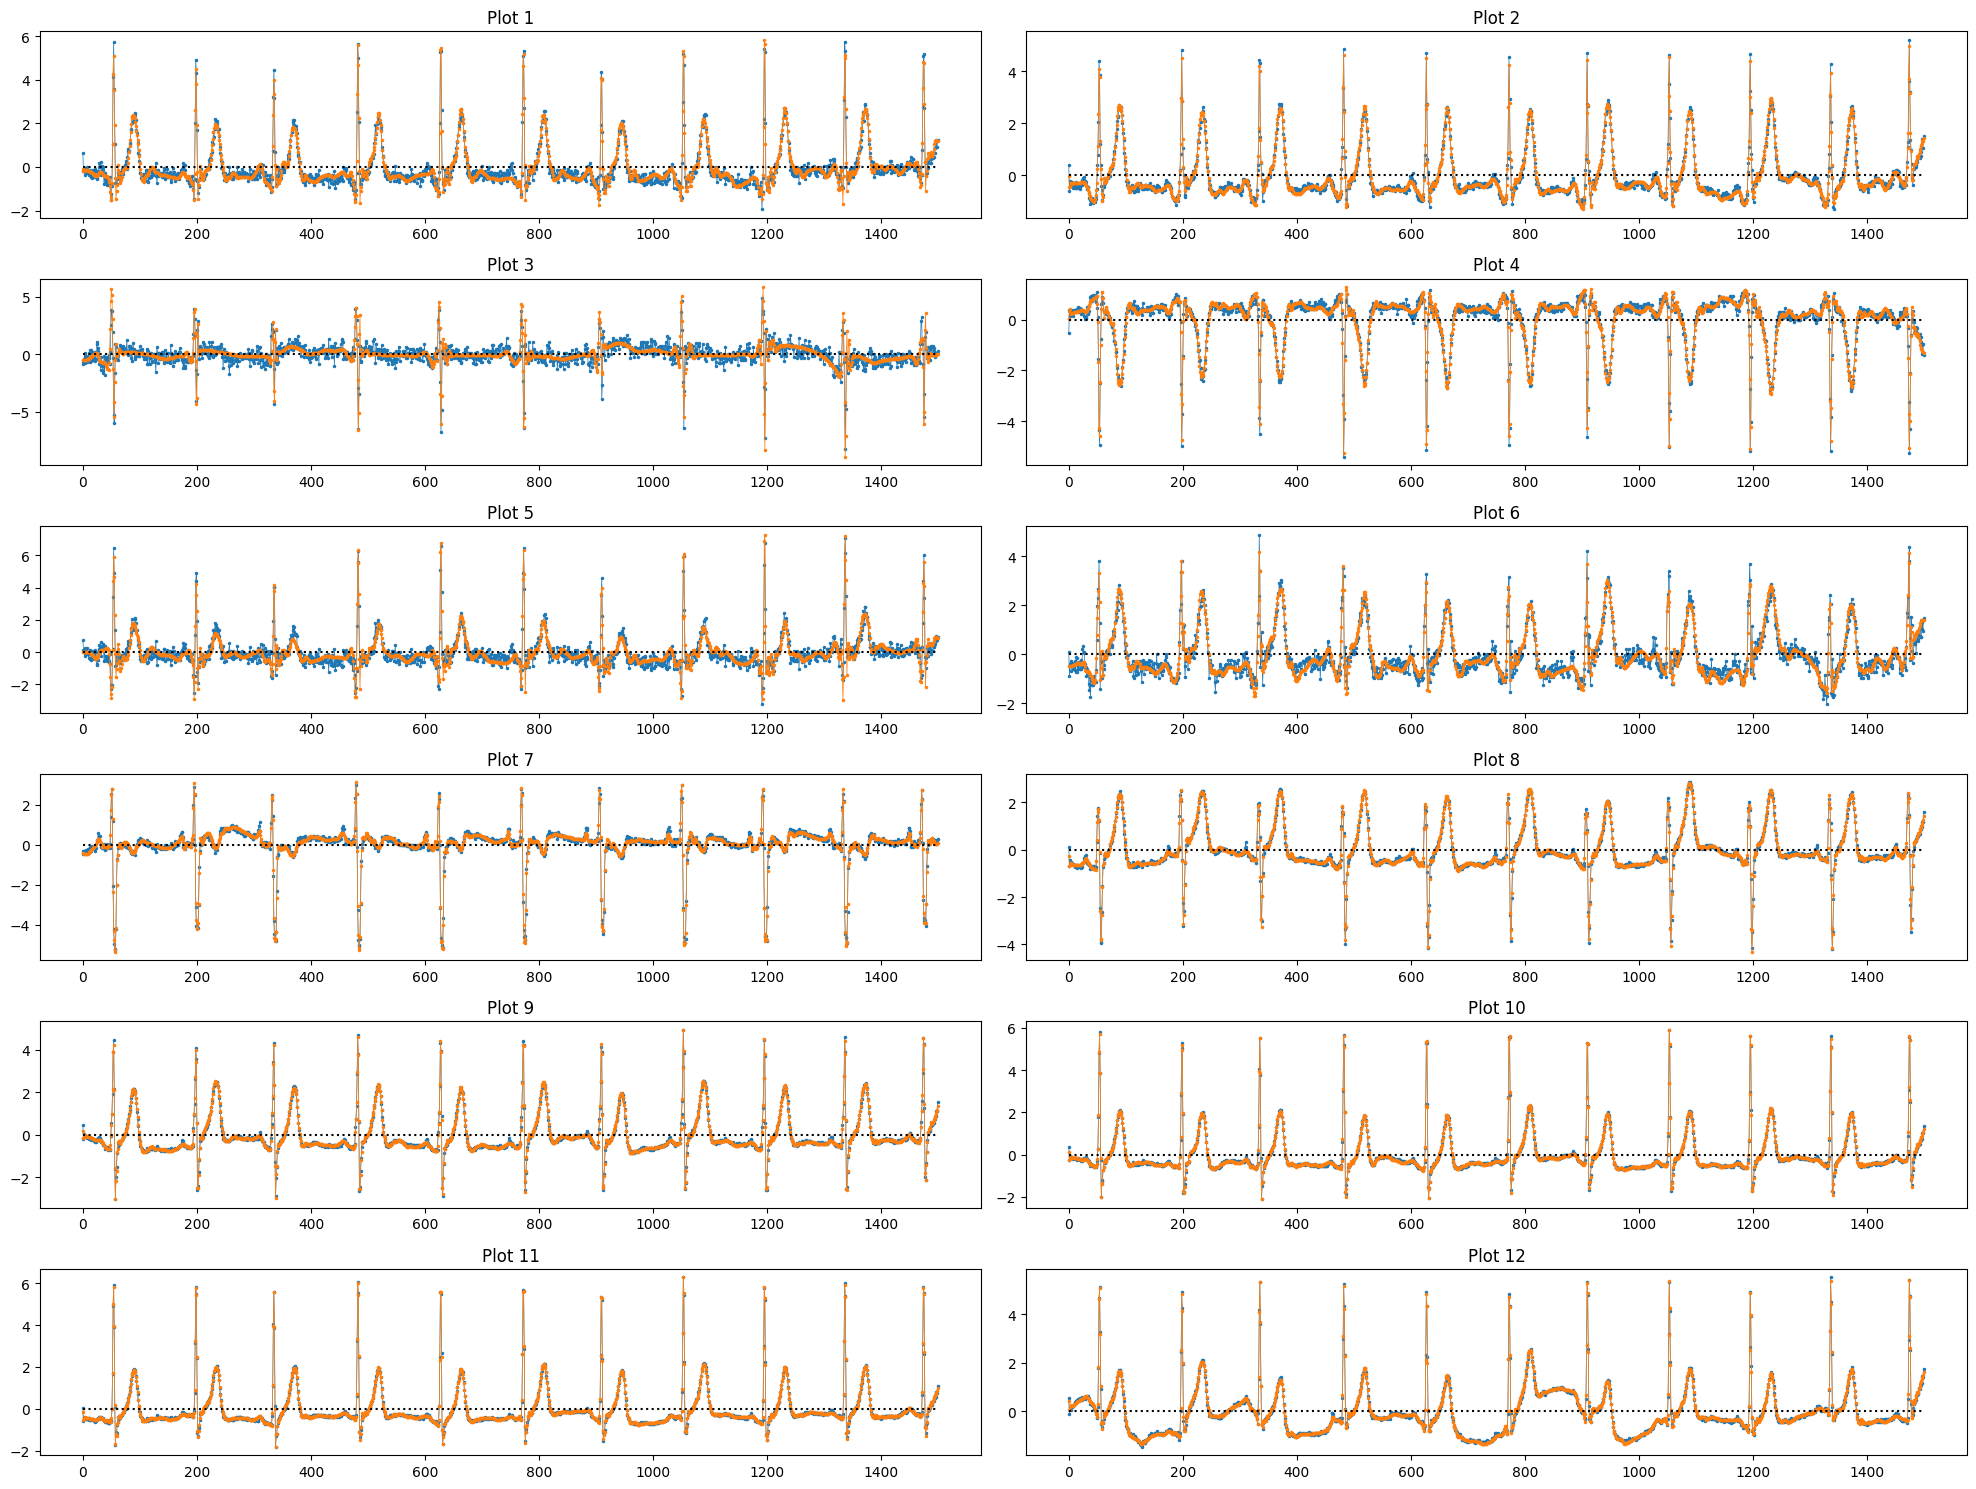

In [11]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i in range(12):
    axes[i].plot(original[i][:PERIOD], '.-', linewidth=0.5, markersize=3)
    axes[i].plot(Y[i][:PERIOD], '.-', linewidth=0.5, markersize=3)
    axes[i].hlines(baseline[i], 0, 1500, linestyles="dotted", colors="black")
    axes[i].set_title(f"Plot {i+1}")
plt.tight_layout()
plt.show()

In [12]:
# rec = pd.read_csv("/Users/ljoana/repos/rPSMF/tt.csv", header=None).to_numpy()
# rec = pd.read_csv("/Users/ljoana/repos/rPSMF/400s_r3_n3_60it_wavelet_stand_20test.csv", header=None).to_numpy()
# rec2 = pd.read_csv("/Users/ljoana/repos/rPSMF/400s_r3_n3_150it_wavelet_stand_20test.csv", header=None).to_numpy()
# rec3 = pd.read_csv("/Users/ljoana/repos/rPSMF/400s_r3_n3_60it_wavelet_stand_20test.csv", header=None).to_numpy()
rec = rec = pd.read_csv("/Users/ljoana/repos/rPSMF/5000s_r3_n3_100it_wavelet_stand_0test.csv", header=None).to_numpy()
rec

array([[-0.90095959, -0.91844733, -0.8981336 , ...,  0.52939444,
         0.58039381,  0.60131857],
       [-0.97064763, -0.97198996, -0.96236826, ...,  0.64920519,
         0.71159037,  0.73138889],
       [-0.07494662, -0.08536208, -0.10557828, ...,  0.12762791,
         0.13718742,  0.13977853],
       ...,
       [-0.87690962, -0.88632146, -0.87016326, ...,  0.50493853,
         0.55337062,  0.57454124],
       [-0.95796427, -0.98957945, -0.98743478, ...,  0.51030742,
         0.5576884 ,  0.58456574],
       [-0.81007235, -0.7998665 , -0.77098638, ...,  0.5038773 ,
         0.54959027,  0.57255022]])

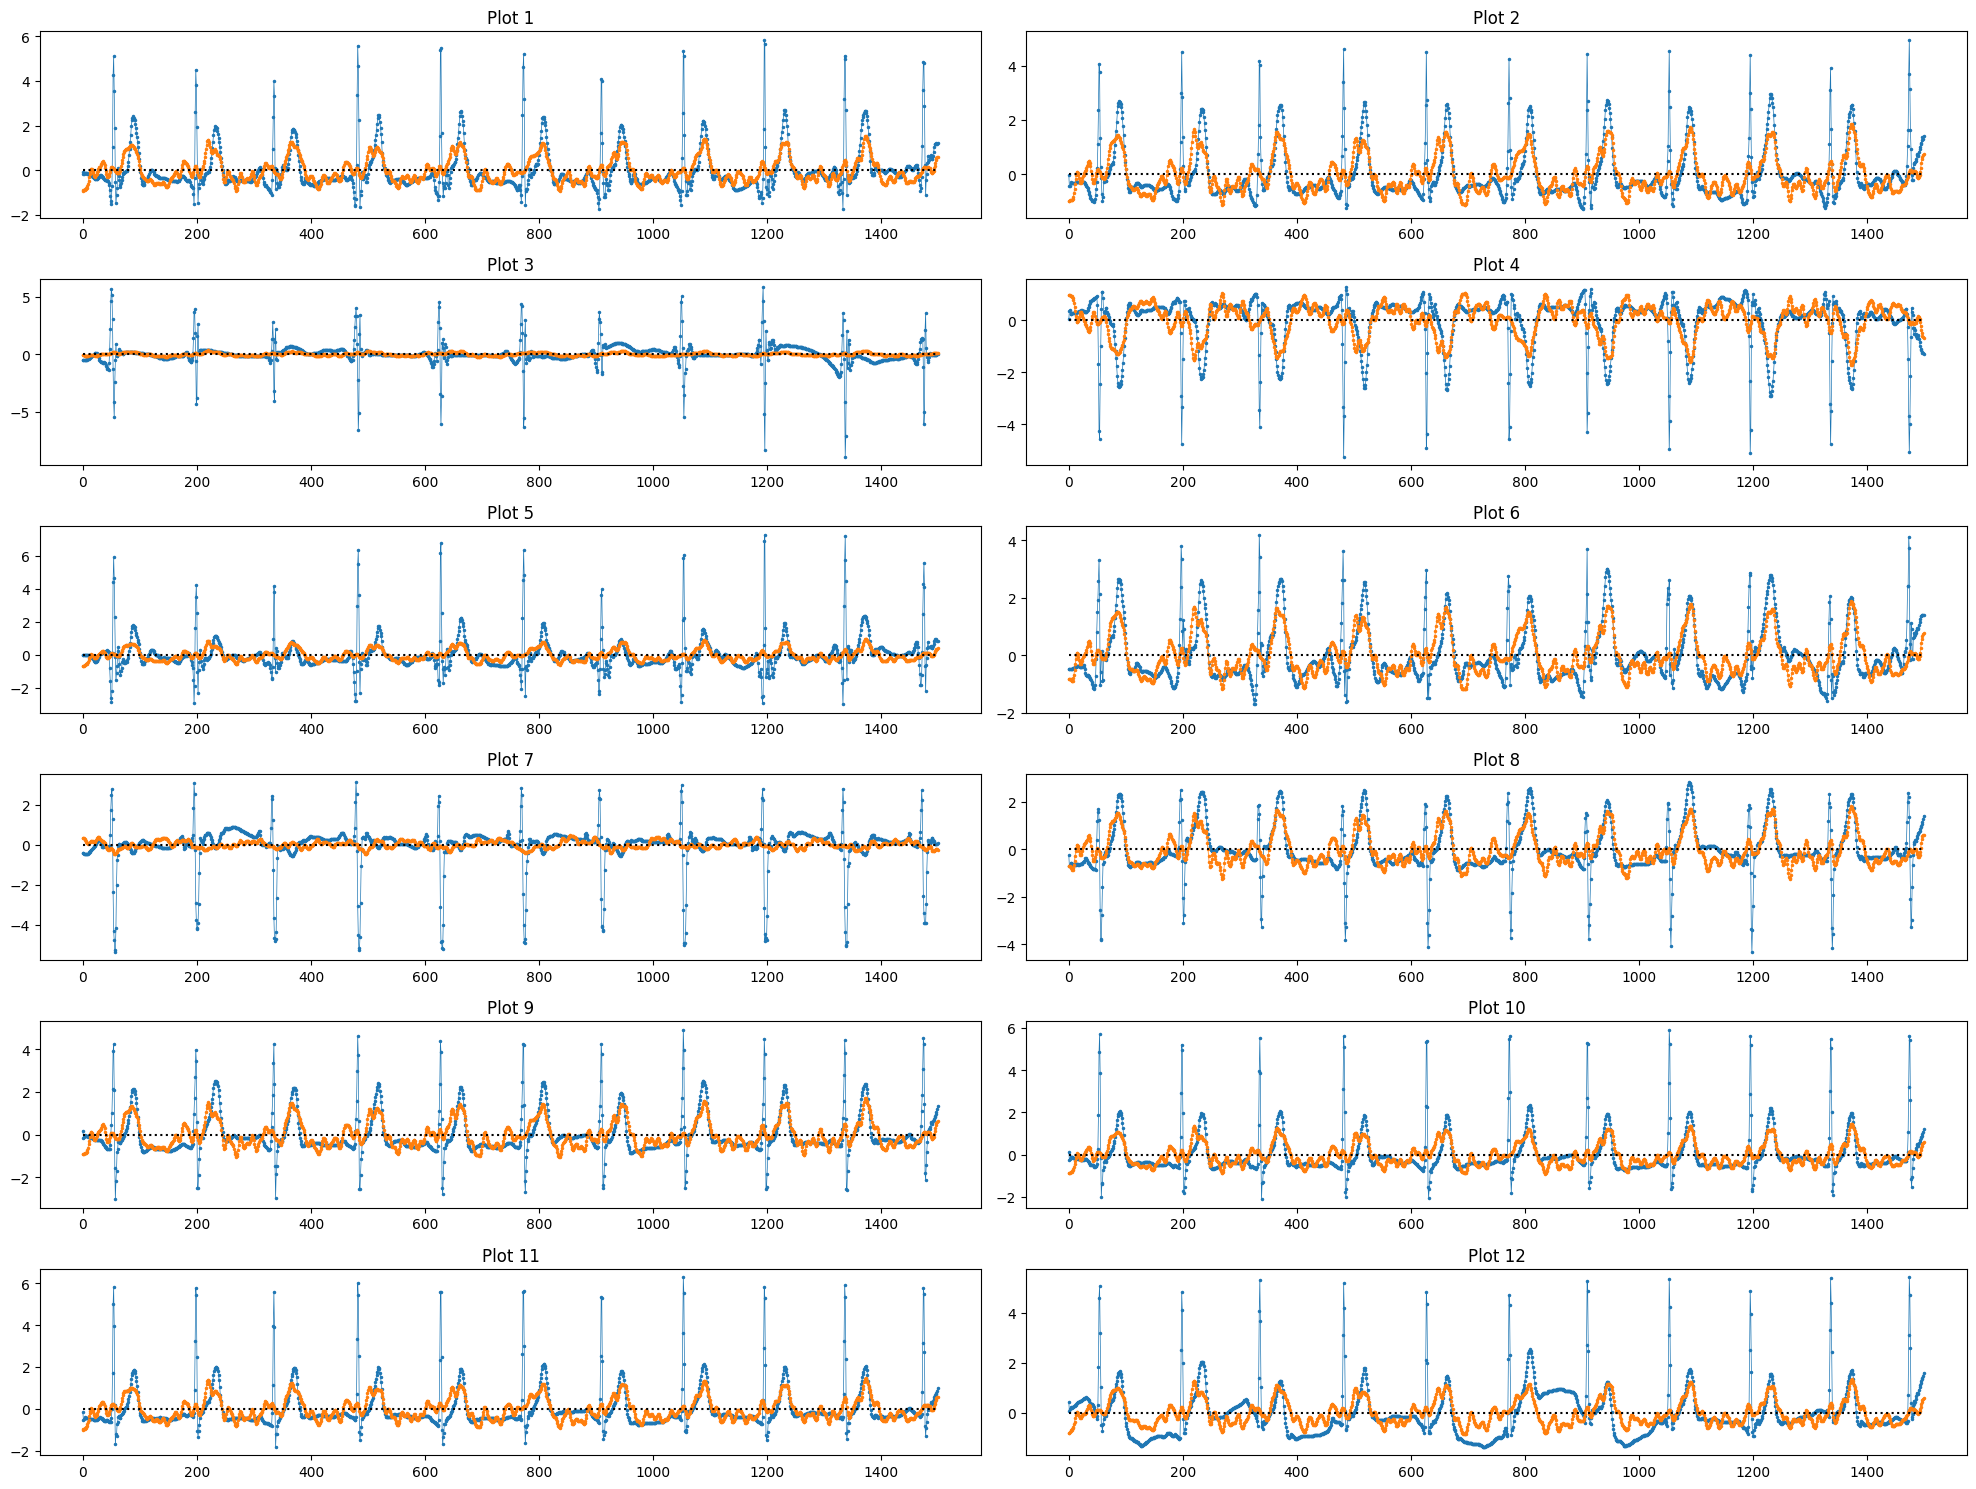

In [13]:
fit_index = int(1500 - 0 * 1500)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i in range(12):
    axes[i].plot(Y[i][:fit_index], '.-', linewidth=0.5, markersize=3)
    axes[i].plot(rec[i][:fit_index], '.-', linewidth=0.5, markersize=3)
    axes[i].hlines(baseline[i], 0, fit_index, linestyles="dotted", colors="black")
    axes[i].set_title(f"Plot {i+1}")
plt.tight_layout()
plt.show()

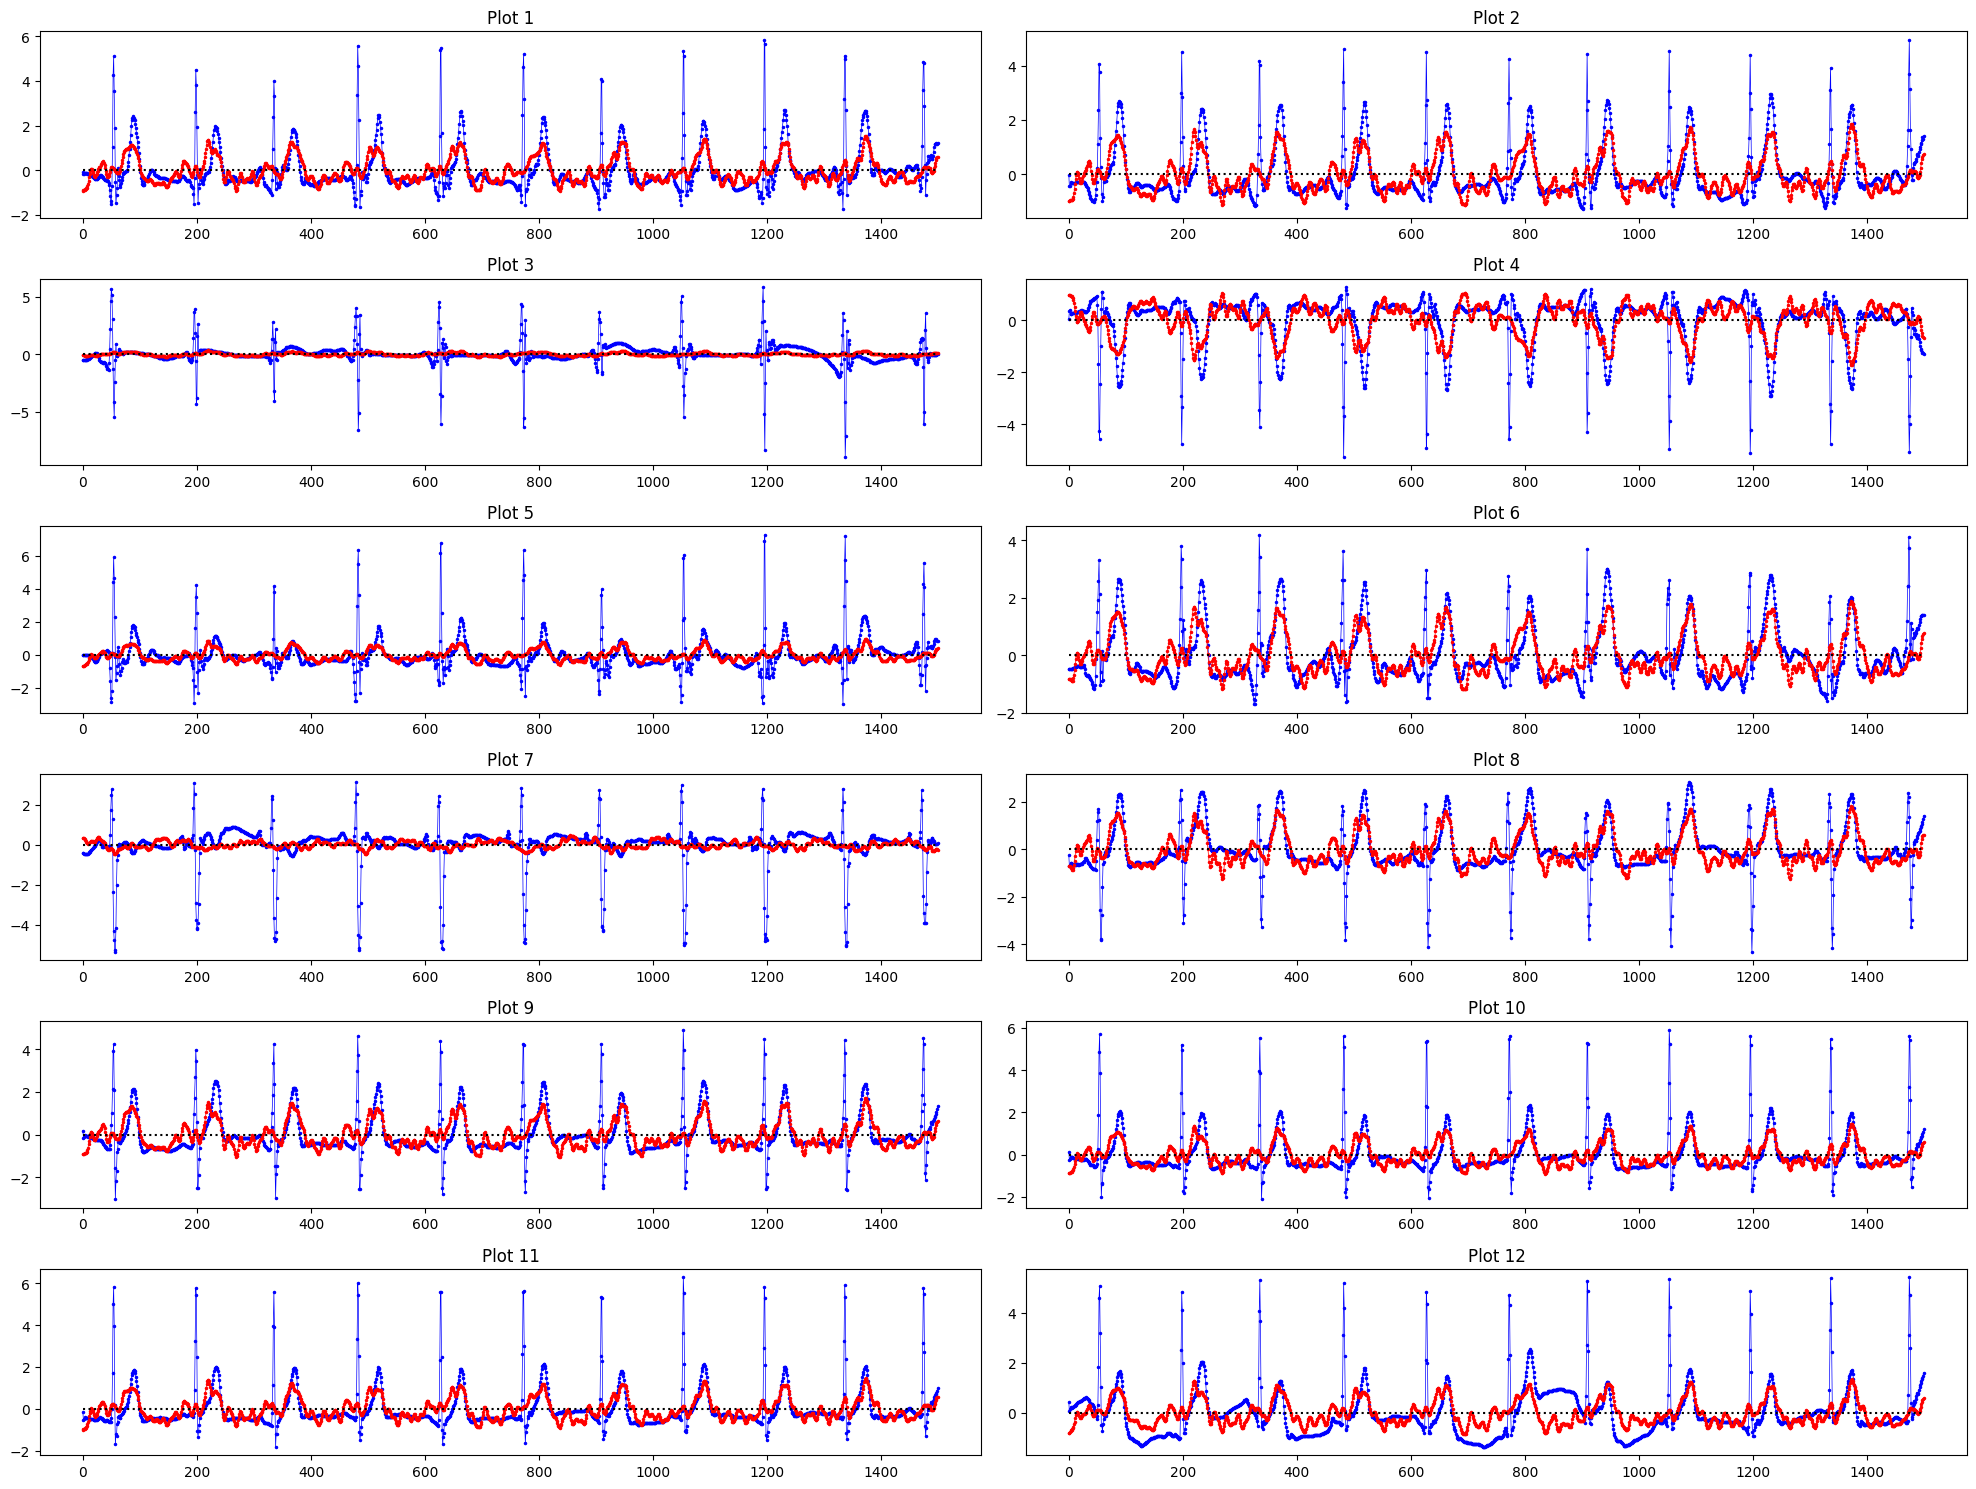

In [14]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i in range(12):
    axes[i].plot(range(fit_index), Y[i][:fit_index], '.-', c='blue', label='Up to fit_index', linewidth=0.5, markersize=3)
    axes[i].plot(range(fit_index, 1500), Y[i][fit_index:1500], '.-', c='orange', label='From fit_index', linewidth=0.5, markersize=3)
    axes[i].plot(rec[i], '.-', c="red", label='rec3 up to fit_index', linewidth=0.5, markersize=3)
    axes[i].hlines(baseline[i], 0, 1500, linestyles="dotted", colors="black")
    axes[i].set_title(f"Plot {i+1}")
plt.tight_layout()
plt.show()

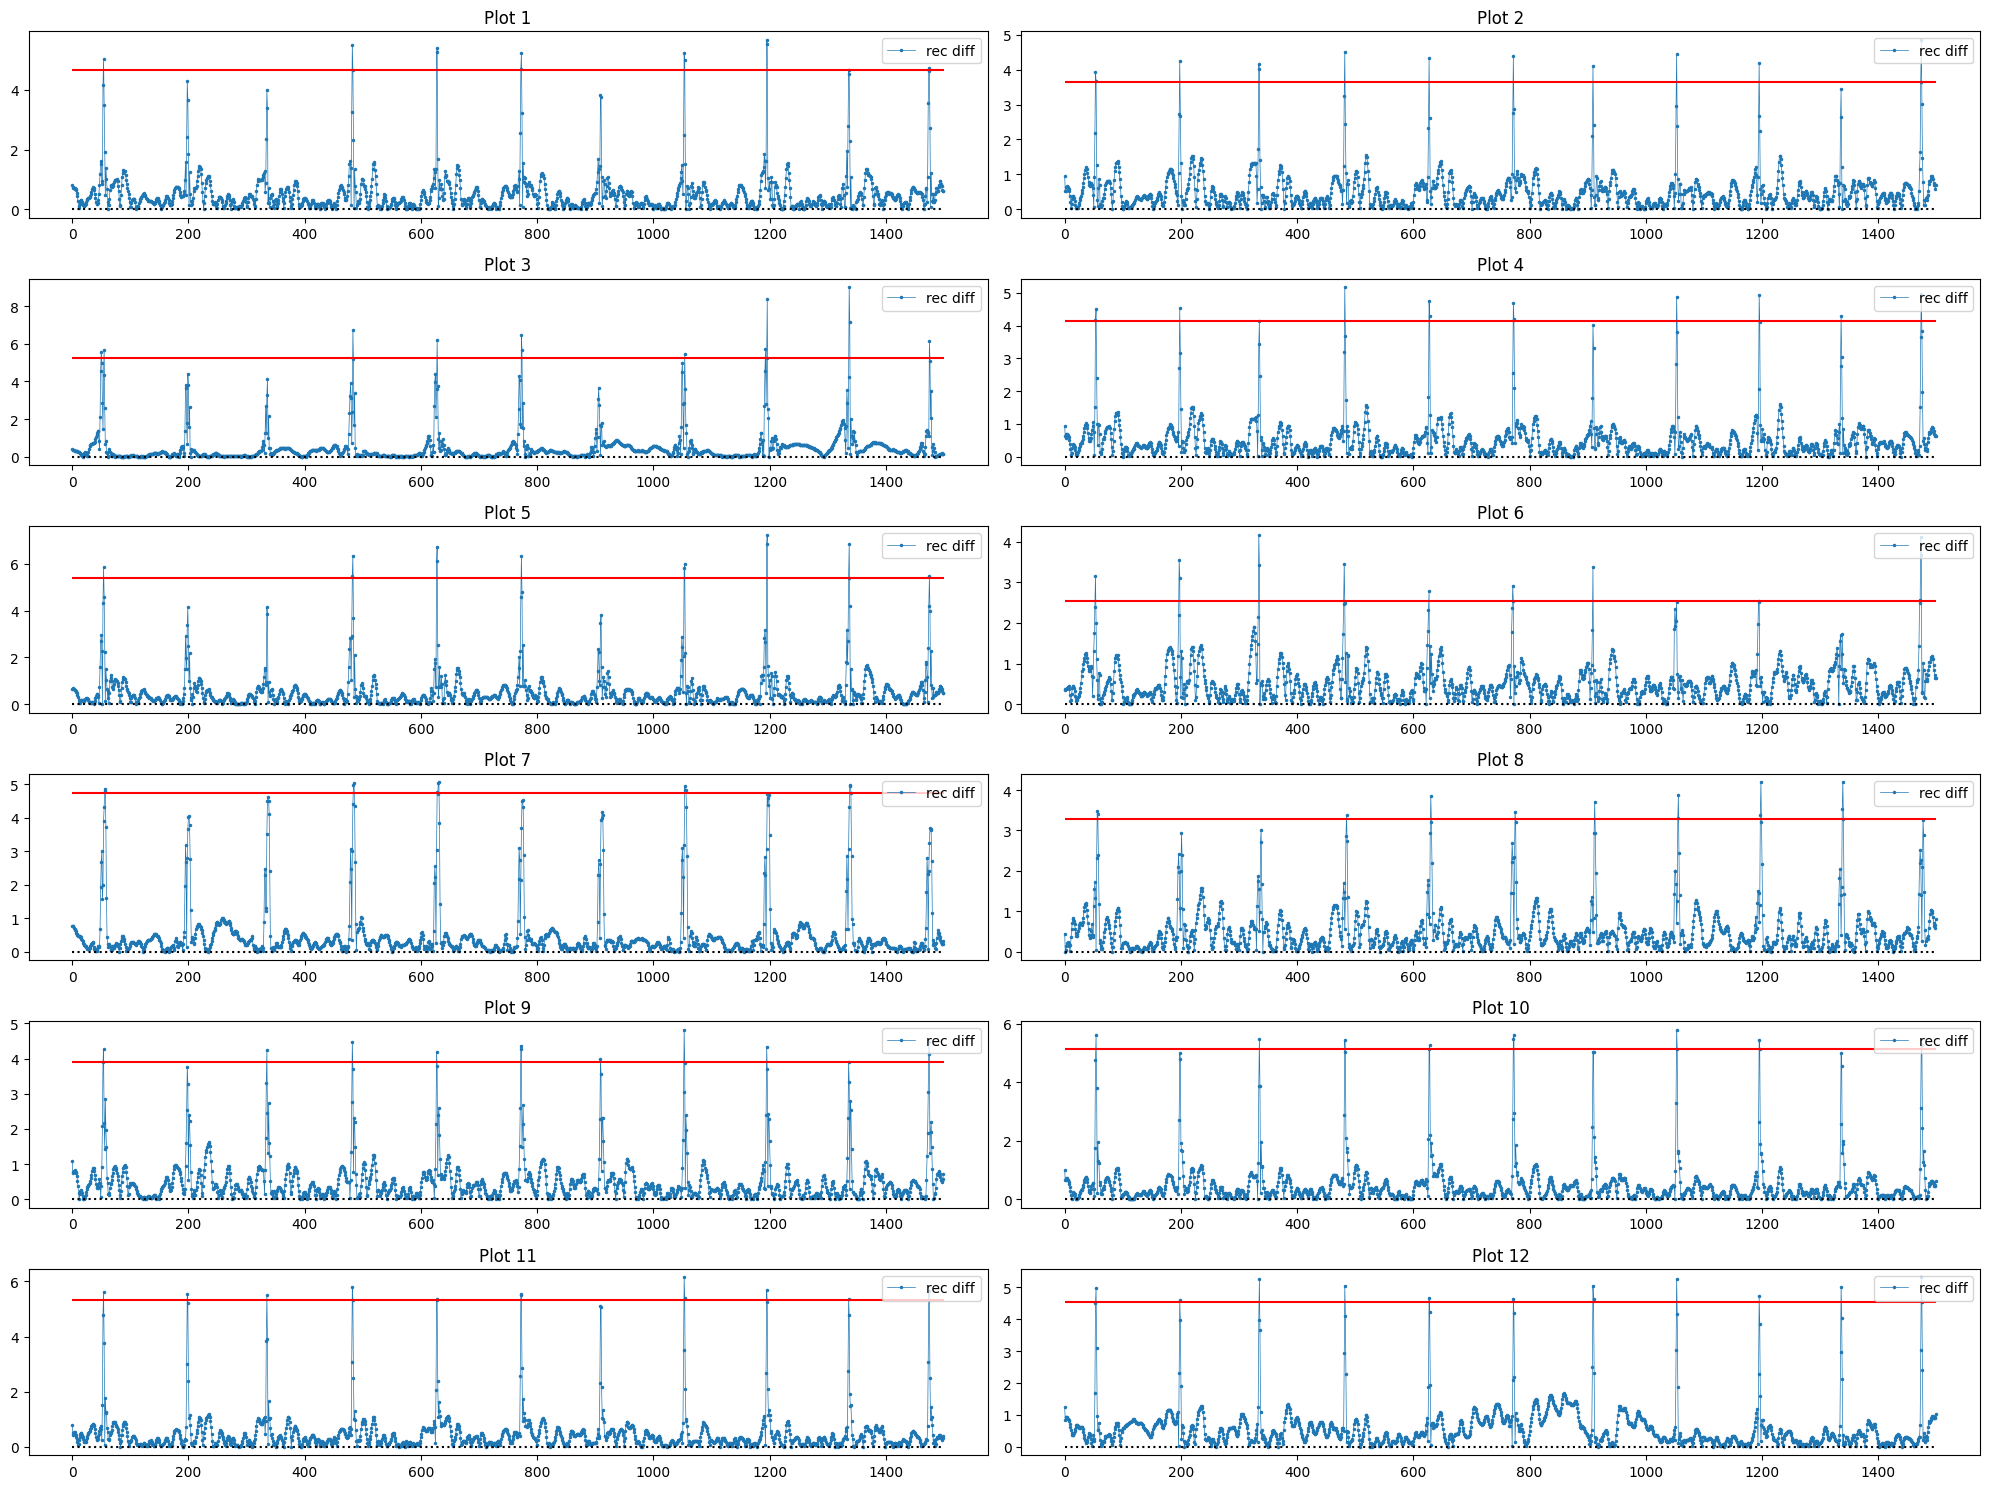

In [15]:
time = np.arange(fit_index)
baseline = baseline.reshape(12,1)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i in range(12):
    difference = np.abs(Y[i][:fit_index] - rec[i][:fit_index])
    threshold = np.percentile(difference, 99.2)
    
    axes[i].plot(time, difference, '.-', label='rec diff', linewidth=0.5, markersize=3)
    axes[i].hlines(baseline[i], 0, fit_index, linestyles="dotted", colors="black")
    axes[i].hlines(threshold, 0, fit_index, linestyles="-", colors="red")
    axes[i].set_title(f"Plot {i+1}")
    axes[i].legend(loc="upper right")
plt.tight_layout()
plt.show()

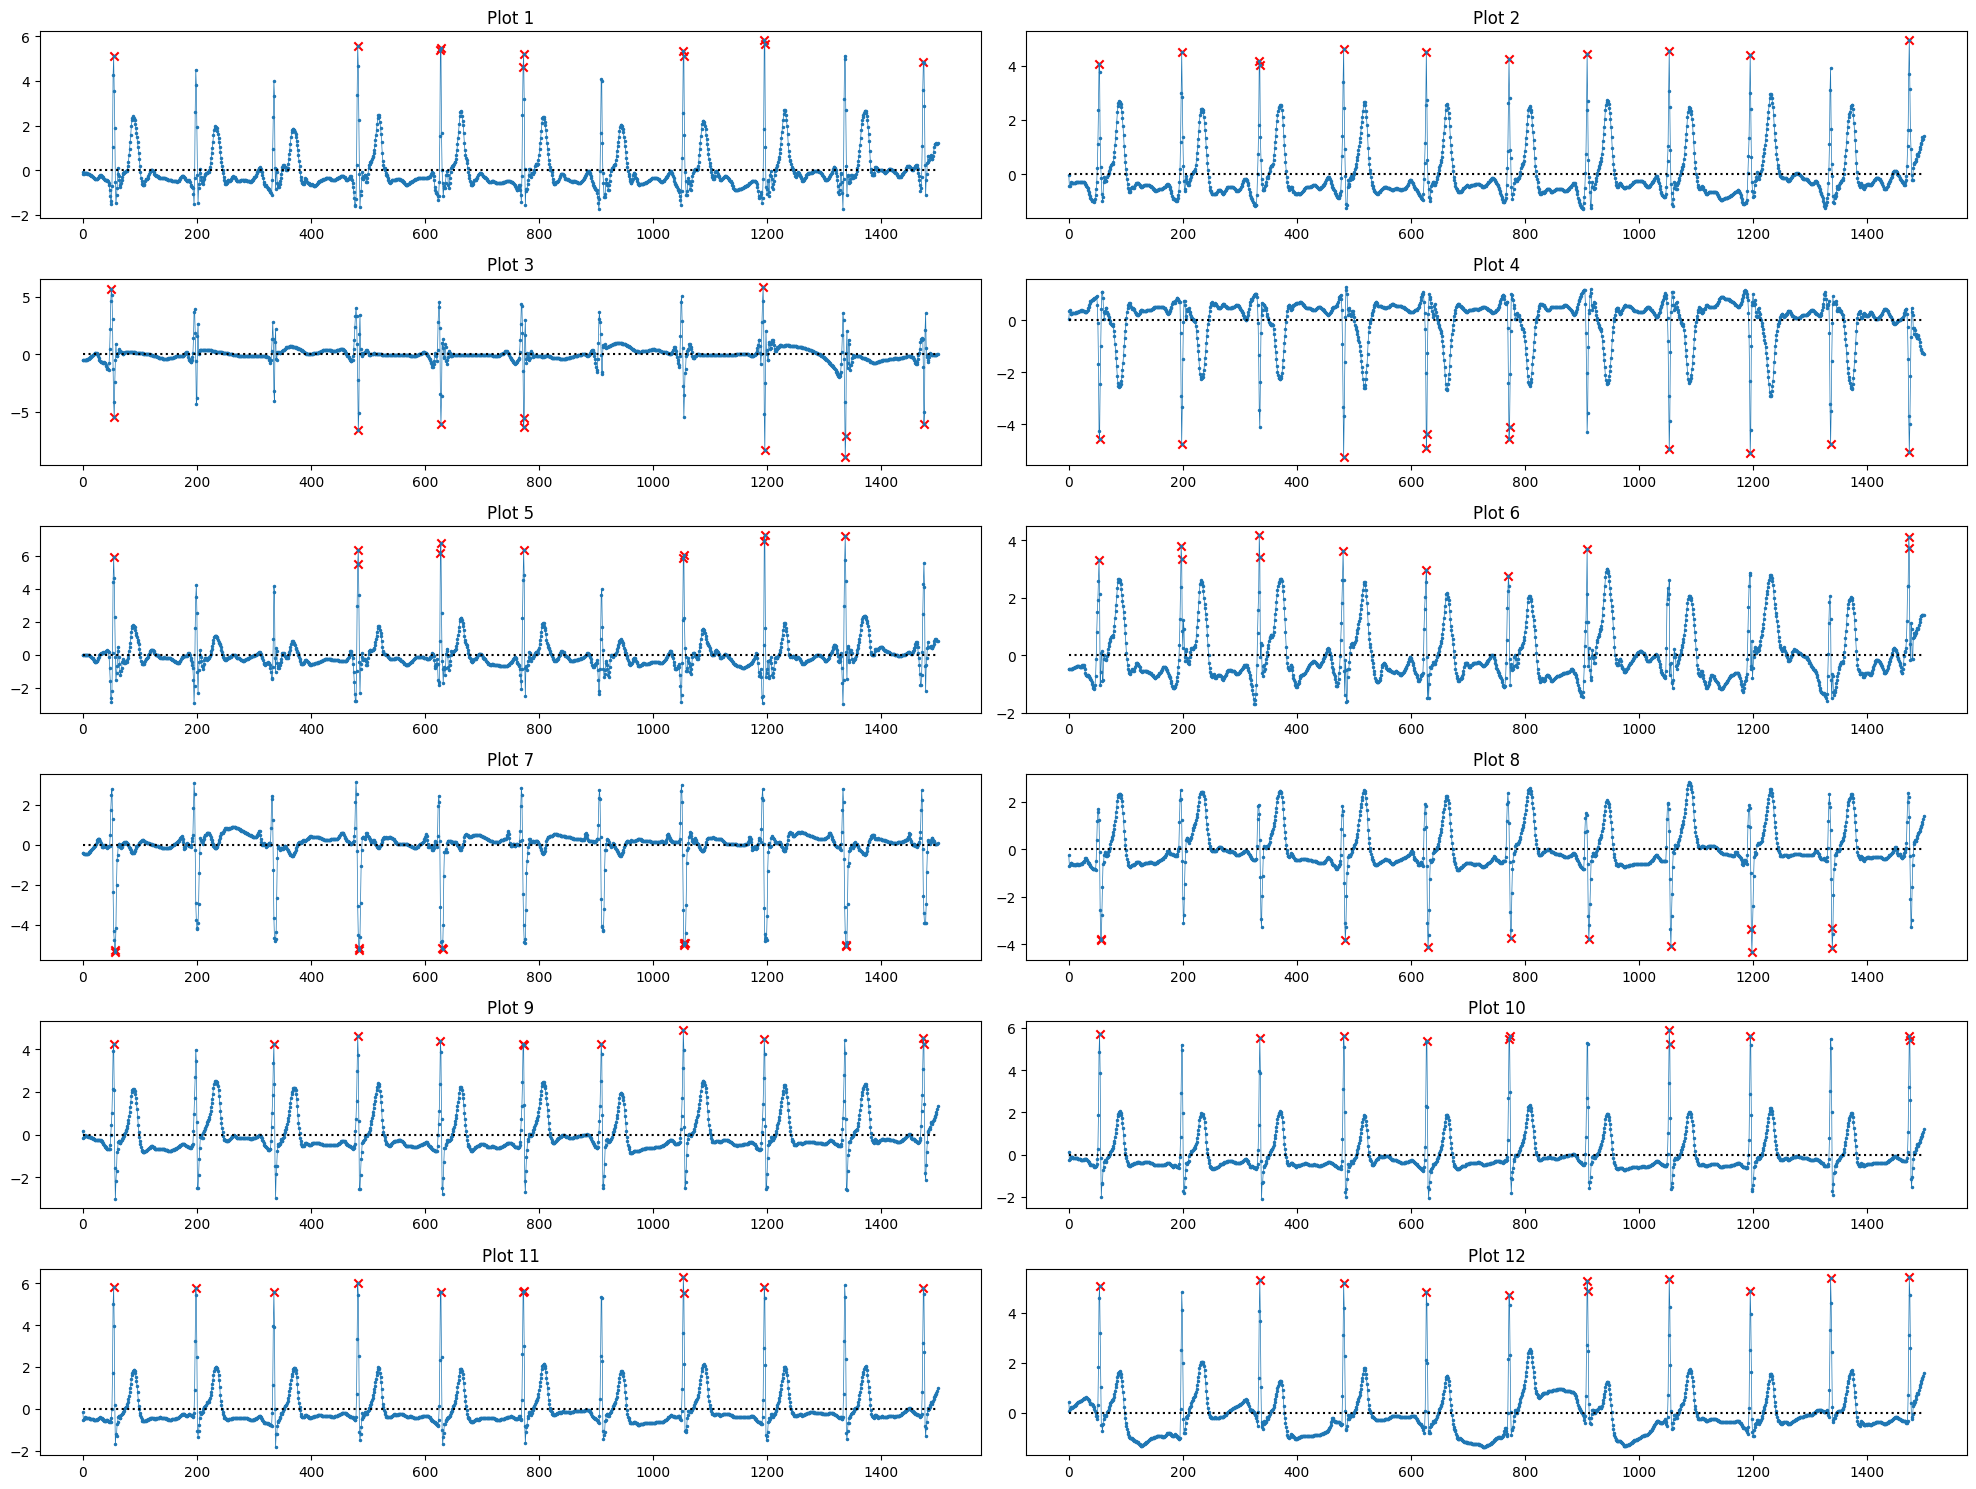

In [17]:
time = np.arange(fit_index)
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 15))
axes = axes.flatten()
for i in range(12):
    difference = np.abs(Y[i][:fit_index] - rec[i][:fit_index])
    threshold = np.percentile(difference, 99.3)
    
    isolated_peaks = np.where(difference > threshold, Y[i][:fit_index], 0)
    non_zero_indices = isolated_peaks != 0
    non_zero_times = time[non_zero_indices]
    non_zero_peaks = isolated_peaks[non_zero_indices]
    
    axes[i].plot(time, Y[i][:fit_index], '.-', label='Original Signal', linewidth=0.5, markersize=3)
    axes[i].scatter(non_zero_times, non_zero_peaks, label='Isolated Peaks', marker='x', c="r")
    axes[i].hlines(baseline[i], 0, fit_index, linestyles="dotted", colors="black")
    axes[i].set_title(f"Plot {i+1}")
plt.tight_layout()
plt.savefig(f"rpeaks_full_m.pdf")
plt.show()